Analyze and visualize the performance change while using LSTM (Long Short-Term
Memory) and GRU (Gated Recurrent Unit) instead of a standard RNN (Recurrent Neural Network) for sentiment analysis on the IMDB dataset. Compare the performance of different RNN architectures and understand their impact on sentiment classification.

In [ ]:
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, GRU, Dense

num_words = 10000
max_length = 200
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=num_words)
X_train = pad_sequences(X_train, maxlen=max_length)
X_test = pad_sequences(X_test, maxlen=max_length)

In [ ]:
# LSTM model
lstm_model = Sequential()
lstm_model.add(Embedding(input_dim=num_words, output_dim=128, input_length=max_length))
lstm_model.add(LSTM(128))
lstm_model.add(Dense(1, activation='sigmoid'))

lstm_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# GRU model
gru_model = Sequential()
gru_model.add(Embedding(input_dim=num_words, output_dim=128, input_length=max_length))
gru_model.add(GRU(128))
gru_model.add(Dense(1, activation='sigmoid'))

gru_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

lstm_history = lstm_model.fit(X_train, y_train, validation_split=0.2, epochs=5, batch_size=64)
gru_history = gru_model.fit(X_train, y_train, validation_split=0.2, epochs=5, batch_size=64)

Epoch 1/5
313/313 [==============================] - 62s 175ms/step - loss: 0.4992 - accuracy: 0.7554 - val_loss: 0.5385 - val_accuracy: 0.7154
Epoch 2/5
313/313 [==============================] - 25s 81ms/step - loss: 0.2990 - accuracy: 0.8766 - val_loss: 0.3254 - val_accuracy: 0.8612
Epoch 3/5
313/313 [==============================] - 13s 41ms/step - loss: 0.1918 - accuracy: 0.9297 - val_loss: 0.3437 - val_accuracy: 0.8652
Epoch 4/5
313/313 [==============================] - 12s 39ms/step - loss: 0.1302 - accuracy: 0.9541 - val_loss: 0.3957 - val_accuracy: 0.8572
Epoch 5/5
313/313 [==============================] - 8s 25ms/step - loss: 0.1049 - accuracy: 0.9638 - val_loss: 0.4728 - val_accuracy: 0.8650
Epoch 1/5
313/313 [==============================] - 46s 140ms/step - loss: 0.4892 - accuracy: 0.7502 - val_loss: 0.3534 - val_accuracy: 0.8452
Epoch 2/5
313/313 [==============================] - 18s 56ms/step - loss: 0.2704 - accuracy: 0.8906 - val_loss: 0.3047 - val_accuracy: 0.875

In [ ]:
lstm_loss, lstm_acc = lstm_model.evaluate(X_test, y_test)
gru_loss, gru_acc = gru_model.evaluate(X_test, y_test)

print(f"LSTM Model Accuracy: {round(lstm_acc * 100, 2)}%\nGRU Model Accuracy: {round(gru_acc * 100, 2)}%")

782/782 [==============================] - 4s 6ms/step - loss: 0.5236 - accuracy: 0.8386
LSTM Model Accuracy: 85.39%
GRU Model Accuracy: 83.86%


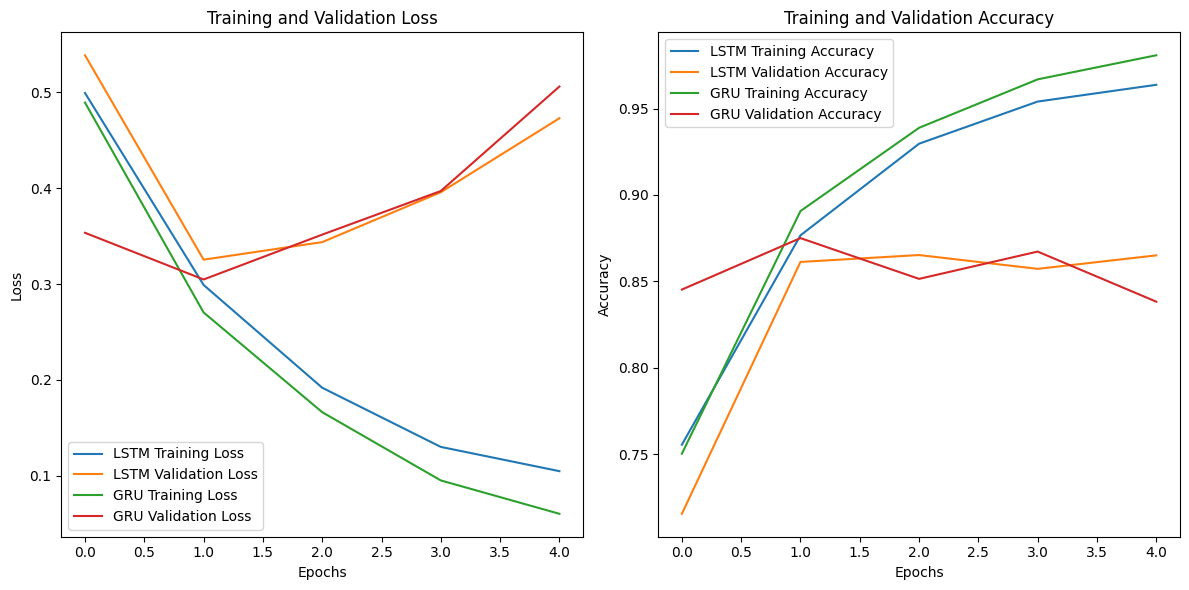

In [ ]:
# Plotting training history
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(lstm_history.history['loss'], label='LSTM Training Loss')
plt.plot(lstm_history.history['val_loss'], label='LSTM Validation Loss')
plt.plot(gru_history.history['loss'], label='GRU Training Loss')
plt.plot(gru_history.history['val_loss'], label='GRU Validation Loss')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')

plt.subplot(1, 2, 2)
plt.plot(lstm_history.history['accuracy'], label='LSTM Training Accuracy')
plt.plot(lstm_history.history['val_accuracy'], label='LSTM Validation Accuracy')
plt.plot(gru_history.history['accuracy'], label='GRU Training Accuracy')
plt.plot(gru_history.history['val_accuracy'], label='GRU Validation Accuracy')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')

plt.tight_layout()
plt.show()